# Comprehensive Analysis of Daily Stock Prices Using Pandas
In this formal project, a comprehensive analysis of daily close stock prices for five leading companies is undertaken: Exxon (XOM), Canadian Solar (CSIQ), Intel (INTC), Walmart (WMT), and Palantir (PLTR). Using Python's Pandas library, the goal is to provide insightful information about stock performance, trends, and correlations. Through data exploration, statistical analysis, and visualization, valuable insights are derived for investors, analysts, and stakeholders in the financial sector.

## Project Objectives

1. **Data Exploration:** The project starts by loading and exploring the stock data to understand its structure and characteristics.

2. **Data Manipulation:** Utilizing Pandas, relevant subsets of data are extracted and manipulated to focus on specific time periods, stocks, and metrics.

3. **Statistical Analysis:** Descriptive statistics are used to uncover patterns and distributions in stock prices, while correlation analysis reveals relationships between different stocks.

4. **Identifying Best and Worst Days:** Top 10 best and worst performing days are identified for selected stocks based on growth rates, providing insights into extreme fluctuations.

5. **Monthly Average Analysis:** Monthly average share growth rates are calculated and visualized to identify long-term trends and seasonality effects.



### Data Examination

In [96]:
#Importing appropriate modules
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [97]:
# Read in the stock data from a CSV file
Stock_df = pd.read_csv("Stock_Data.csv")

In [98]:
# Convert 'Date' column to datetime format for time-series data and set it as the index
Stock_df['Date'] = pd.to_datetime(Stock_df['Date'])
Stock_df.set_index('Date', inplace=True)

In [99]:
#Get a concise summary of the dataframe, including data types and non-null values
Stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 793 entries, 2020-10-01 to 2023-11-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLTR    793 non-null    float64
 1   CSIQ    793 non-null    float64
 2   WMT     793 non-null    float64
 3   INTC    793 non-null    float64
 4   XOM     793 non-null    float64
dtypes: float64(5)
memory usage: 37.2 KB


In [100]:
# Examine the number of rows, columns, shape, and size of the dataframe
print("The number of rows in the data set is {} rows".format(len(Stock_df)))
print("The number of columns in the data set is {} columns".format(len(Stock_df.columns)))
print("The shape of the data sets is {}".format(Stock_df.shape))
print("The size of the data set is {}".format(Stock_df.size))

The number of rows in the data set is 793 rows
The number of columns in the data set is 5 columns
The shape of the data sets is (793, 5)
The size of the data set is 3965


**Discussion**  
This is a dataframe entitled Stock_df that has 793  row entries and 6 columns: Date, PLTR, CSIQ, WMT, INTC and XOM. It is a dataframe that examines daily close stock prices for Exxon (XOM), Canadian Solar(CSIQ), Intel (INTC), Walmart (WMT), Palantir and (PLTR). It is of class 'pandas.core.frame.Dataframe'> and contains daily stock prices from dates 2020-10-01 to 2023-11-24. All of the data are float64 types, with the exception of 'Date' that is an object type.


In [101]:
# Displaying first five rows of the dataframe
Stock_df.head()

,PLTR,CSIQ,WMT,INTC,XOM
Date,,,,,
2020-10-01,9.46,36.349998,136.585449,47.513191,28.344952
2020-10-02,9.20,35.900002,134.122559,46.394485,28.216616
2020-10-05,9.03,38.250000,135.363586,47.012951,28.866850
2020-10-06,9.90,38.919998,134.246643,46.721905,28.567400
2020-10-07,10.00,40.779999,134.494858,47.904278,28.661514


In [102]:
# Displaying the last five rows of the dataframe
Stock_df.tail()

,PLTR,CSIQ,WMT,INTC,XOM
Date,,,,,
2023-11-17,20.490000,20.450001,155.350006,43.810001,104.959999
2023-11-20,21.340000,20.809999,155.300003,44.740002,104.500000
2023-11-21,19.799999,20.620001,155.860001,43.639999,104.459999
2023-11-22,19.690001,20.980000,154.669998,43.669998,104.010002
2023-11-24,19.200001,20.879999,156.059998,43.959999,104.570000


### Locating Specific Columns and Rows for Flexible Extraction of Data

In [103]:
# Locating specific rows and columns using .iloc
Stock_df.iloc[[0]]  # Show the data in row 1

,PLTR,CSIQ,WMT,INTC,XOM
Date,,,,,
2020-10-01,9.46,36.349998,136.585449,47.513191,28.344952


In [104]:
Stock_df.iloc[[2, 10, 100]]  # Show the data in rows 2, 10, and 100

,PLTR,CSIQ,WMT,INTC,XOM
Date,,,,,
2020-10-05,9.030000,38.250000,135.363586,47.012951,28.866850
2020-10-15,9.910000,38.910000,137.969620,48.977509,29.474300
2021-02-25,23.959999,45.619999,126.421059,55.670296,49.687141


In [105]:
Stock_df.iloc[20:40]  # Show the data in rows 20 through 40

,PLTR,CSIQ,WMT,INTC,XOM
Date,,,,,
2020-10-29,10.750000,37.680000,133.568848,40.118809,28.208061
2020-10-30,10.130000,36.349998,132.451981,40.273430,27.908611
2020-11-02,10.540000,36.959999,134.027084,40.437138,29.080744
2020-11-03,10.500000,36.730000,136.299042,40.791859,28.584511
2020-11-04,10.720000,35.700001,135.516312,41.564945,28.430513
2020-11-05,11.880000,39.970001,136.957733,41.848946,28.379173
2020-11-06,13.830000,39.849998,139.153351,41.583267,28.045506
2020-11-09,14.670000,39.320000,137.024536,41.775650,31.596107
2020-11-10,14.000000,38.930000,138.952866,41.629070,32.297077


In [106]:
Stock_df.iloc[20:40, 0:]  # Show data in rows 20-40 for stocks 'PLTR' through 'INTC'

,PLTR,CSIQ,WMT,INTC,XOM
Date,,,,,
2020-10-29,10.750000,37.680000,133.568848,40.118809,28.208061
2020-10-30,10.130000,36.349998,132.451981,40.273430,27.908611
2020-11-02,10.540000,36.959999,134.027084,40.437138,29.080744
2020-11-03,10.500000,36.730000,136.299042,40.791859,28.584511
2020-11-04,10.720000,35.700001,135.516312,41.564945,28.430513
2020-11-05,11.880000,39.970001,136.957733,41.848946,28.379173
2020-11-06,13.830000,39.849998,139.153351,41.583267,28.045506
2020-11-09,14.670000,39.320000,137.024536,41.775650,31.596107
2020-11-10,14.000000,38.930000,138.952866,41.629070,32.297077


In [107]:
Stock_df.iloc[0::30]  # Show data collected for every 30 days

,PLTR,CSIQ,WMT,INTC,XOM
Date,,,,,
2020-10-01,9.460000,36.349998,136.585449,47.513191,28.344952
2020-11-12,14.580000,39.419998,141.501663,41.180172,30.868853
2020-12-28,25.629999,51.259998,139.135025,43.122372,36.572979
2021-02-10,35.700001,60.750000,138.090714,54.250885,45.552490
2021-03-25,22.580000,44.430000,128.930817,57.163433,50.061398
2021-05-07,19.750000,39.630001,135.415924,53.481449,55.630707
2021-06-21,25.420000,38.340000,131.745605,51.812183,56.585789
2021-08-03,22.240000,41.599998,138.912415,50.133648,52.616917
2021-09-15,27.080000,37.599998,140.131287,51.448826,51.779705


In [108]:
# Locating specific rows and columns using .loc
Stock_df.loc[(slice(None)),['XOM']]  # Slice all rows but only for column 'XOM'

,XOM
Date,
2020-10-01,28.344952
2020-10-02,28.216616
2020-10-05,28.866850
2020-10-06,28.567400
2020-10-07,28.661514
...,...
2023-11-17,104.959999
2023-11-20,104.500000
2023-11-21,104.459999


In [109]:
Stock_df.loc[(slice(None)),['WMT', 'XOM']]  # Slice all rows but only columns 'WMT' and 'XOM'

,WMT,XOM
Date,,
2020-10-01,136.585449,28.344952
2020-10-02,134.122559,28.216616
2020-10-05,135.363586,28.866850
2020-10-06,134.246643,28.567400
2020-10-07,134.494858,28.661514
...,...,...
2023-11-17,155.350006,104.959999
2023-11-20,155.300003,104.500000
2023-11-21,155.860001,104.459999


In [110]:
Stock_df.loc[:,['WMT', "XOM"]]  # Slice all rows and all columns between 'WMT' and 'XOM'

,WMT,XOM
Date,,
2020-10-01,136.585449,28.344952
2020-10-02,134.122559,28.216616
2020-10-05,135.363586,28.866850
2020-10-06,134.246643,28.567400
2020-10-07,134.494858,28.661514
...,...,...
2023-11-17,155.350006,104.959999
2023-11-20,155.300003,104.500000
2023-11-21,155.860001,104.459999


In [111]:
Stock_df.loc['2020-10-07':'2020-10-08', 'PLTR':'XOM']  # Slice rows between two dates for columns between 'PLTR' and 'XOM'

,PLTR,CSIQ,WMT,INTC,XOM
Date,,,,,
2020-10-07,10.0,40.779999,134.494858,47.904278,28.661514
2020-10-08,10.0,39.480000,134.943542,48.540943,30.167315


In [112]:
Stock_df.loc[:, 'WMT':'XOM']>=50  # Slice elements where values in columns between 'WMT' and 'XOM' are >= 50

,WMT,INTC,XOM
Date,,,
2020-10-01,True,False,False
2020-10-02,True,False,False
2020-10-05,True,False,False
2020-10-06,True,False,False
2020-10-07,True,False,False
...,...,...,...
2023-11-17,True,False,True
2023-11-20,True,False,True
2023-11-21,True,False,True


In [113]:
Stock_df.loc[Stock_df.index > '2022-04-19']  # Slice rows where dates are greater than 2022-04-19

,PLTR,CSIQ,WMT,INTC,XOM
Date,,,,,
2022-04-20,12.790000,32.439999,155.974335,45.562458,82.717529
2022-04-21,12.330000,30.250000,156.208817,44.984756,81.842949
2022-04-22,11.960000,29.530001,153.267776,44.075592,80.056183
2022-04-25,12.110000,28.760000,153.345917,44.568062,77.357254
2022-04-26,11.120000,27.510000,151.743500,43.109604,77.385452
...,...,...,...,...,...
2023-11-17,20.490000,20.450001,155.350006,43.810001,104.959999
2023-11-20,21.340000,20.809999,155.300003,44.740002,104.500000
2023-11-21,19.799999,20.620001,155.860001,43.639999,104.459999


### Calculating Growth and Column Organization

In [114]:
# Calculating the average daily growth in share prices
Stock_growth=Stock_df.copy()
Stock_growth=Stock_df.pct_change()
display(Stock_growth)

,PLTR,CSIQ,WMT,INTC,XOM
Date,,,,,
2020-10-01,NaN,NaN,NaN,NaN,NaN
2020-10-02,-0.027484,-0.012380,-0.018032,-0.023545,-0.004528
2020-10-05,-0.018478,0.065460,0.009253,0.013331,0.023044
2020-10-06,0.096346,0.017516,-0.008251,-0.006191,-0.010373
2020-10-07,0.010101,0.047790,0.001849,0.025307,0.003294
...,...,...,...,...,...
2023-11-17,0.036419,-0.002925,-0.004422,0.010611,0.024400
2023-11-20,0.041484,0.017604,-0.000322,0.021228,-0.004383
2023-11-21,-0.072165,-0.009130,0.003606,-0.024587,-0.000383


In [115]:
# Renaming columns in Stock_growth to include '_growth' suffix
Stock_growth.rename(columns={'PLTR': 'PLTR_growth'},inplace=True)
Stock_growth.rename(columns={'CSIQ': 'CSIQ_growth'},inplace=True)
Stock_growth.rename(columns={'WMT': 'WMT_growth'},inplace=True)
Stock_growth.rename(columns={'INTC': 'INTC_growth'},inplace=True)
Stock_growth.rename(columns={'XOM': 'XOM_growth'},inplace=True)
display(Stock_growth)

,PLTR_growth,CSIQ_growth,WMT_growth,INTC_growth,XOM_growth
Date,,,,,
2020-10-01,NaN,NaN,NaN,NaN,NaN
2020-10-02,-0.027484,-0.012380,-0.018032,-0.023545,-0.004528
2020-10-05,-0.018478,0.065460,0.009253,0.013331,0.023044
2020-10-06,0.096346,0.017516,-0.008251,-0.006191,-0.010373
2020-10-07,0.010101,0.047790,0.001849,0.025307,0.003294
...,...,...,...,...,...
2023-11-17,0.036419,-0.002925,-0.004422,0.010611,0.024400
2023-11-20,0.041484,0.017604,-0.000322,0.021228,-0.004383
2023-11-21,-0.072165,-0.009130,0.003606,-0.024587,-0.000383


### Descriptive Statistics and Correlation Matrix

In [116]:
# Providing basic summary statistics of growth elements
Stock_growth.describe()

,PLTR_growth,CSIQ_growth,WMT_growth,INTC_growth,XOM_growth
count,792.000000,792.000000,792.000000,792.000000,792.000000
mean,0.001968,-0.000013,0.000250,0.000165,0.001855
std,0.046914,0.037281,0.012664,0.022894,0.020324
min,-0.213080,-0.137515,-0.113758,-0.116786,-0.078853
25%,-0.024476,-0.023244,-0.005921,-0.012002,-0.011194
50%,-0.001082,-0.003048,0.000677,0.000191,0.001681
75%,0.023907,0.018960,0.007194,0.012357,0.013611
max,0.254042,0.151925,0.065395,0.106585,0.126601


In [117]:
# Constructing the Pearson correlation coefficient matrix for the data set
matrix = Stock_growth.corr()
print(matrix)

             PLTR_growth  CSIQ_growth  WMT_growth  INTC_growth  XOM_growth
PLTR_growth     1.000000     0.341739    0.122124     0.248004    0.101709
CSIQ_growth     0.341739     1.000000    0.054715     0.238901    0.135685
WMT_growth      0.122124     0.054715    1.000000     0.155796    0.146167
INTC_growth     0.248004     0.238901    0.155796     1.000000    0.213640
XOM_growth      0.101709     0.135685    0.146167     0.213640    1.000000


**Discussion**  
Looking at all of the stocks, we can see that PLTR and XOM have higher mean and maximum growth rates, with PLTR reaching a high of 25.4%. However, PLTR also has a more negative median growth, indicating a distribution of lower growth values. CSIQ also suffers from negative median and mean growth. WMT is more stable and consistent with a positive mean and median growth and a low standard deviation. INTC shows moderate growth rates, suggesting moderate variability. XOM has a positive mean and median growth, indicating a positive performance relative to their peer stocks. The minimum growth values highlight PLTR's significant decline, while the other stocks experience relatively smaller declines. The standard deviations reflect the different levels of variability, with WMT being the most stable. 

In the correlation matrix, we see a medium positive correlation between PLTR and CSIQ, as well as a medium positive correlation between INTC and CSIQ. PLTR shows weak positive correlations with WMT and XOM, while CSIQ has a moderate positive correlation with INTC. WMT, on the other hand, has weak positive correlations with PLTR, CSIQ, and XOM. INTC reveals moderate positive correlations with PLTR and CSIQ. XOM displays weak positive correlations with PLTR, CSIQ, WMT, and a moderate positive correlation with INTC. This correlation matrix shows the strength and positive/negative relationships between the growth rates of these stocks. This could tell us how these stocks might depend on each other in performance and trends.



### Best and Worst Performing Days

In [118]:
# Finding the 10 best and 10 worst days for selected stocks
Stock_growth.nlargest(10, 'WMT_growth', keep='first')  # Best days for WMT
Stock_growth.nsmallest(10, 'WMT_growth', keep='first')  # Worst days for WMT

,PLTR_growth,CSIQ_growth,WMT_growth,INTC_growth,XOM_growth
Date,,,,,
2022-05-17,0.039801,0.101940,-0.113758,0.030641,0.012755
2023-11-16,-0.009023,-0.001946,-0.080928,0.067471,-0.011576
2022-07-26,-0.028926,-0.038748,-0.076049,-0.005107,-0.003890
2022-05-18,-0.041866,0.020974,-0.067910,-0.046171,-0.015851
2021-02-18,-0.070532,-0.068255,-0.064810,-0.003880,-0.015705
2022-08-04,0.010714,0.028950,-0.037778,-0.013691,-0.042079
2021-12-17,0.039258,0.054618,-0.032022,-0.004131,-0.021835
2022-08-26,-0.057007,-0.004914,-0.031427,-0.043852,-0.012312
2022-11-14,-0.036861,-0.012438,-0.029387,-0.002629,0.002919


In [119]:
Stock_growth.nlargest(10, 'INTC_growth', keep='first')  # Best days for INTC
Stock_growth.nsmallest(10, 'INTC_growth', keep='first')  # Worst days for INTC

,PLTR_growth,CSIQ_growth,WMT_growth,INTC_growth,XOM_growth
Date,,,,,
2021-10-22,-0.014124,-0.018058,0.010422,-0.116786,0.006859
2020-10-23,-0.019628,0.011779,0.002090,-0.105751,-0.020080
2021-01-22,0.254042,-0.017927,0.010217,-0.092859,-0.014134
2022-07-29,0.021718,0.024722,0.017726,-0.085621,0.046308
2022-09-13,-0.066167,0.016148,-0.020642,-0.071926,-0.023358
2022-01-27,-0.036863,-0.033539,0.000663,-0.070420,0.012808
2022-04-29,-0.050228,-0.019244,-0.020613,-0.069385,-0.022363
2023-01-27,0.042818,-0.003659,0.007665,-0.064141,-0.018257
2020-12-18,-0.046273,0.088491,-0.001027,-0.062981,-0.017249


**Discussion**  
For the PLTR stock, we observe that most of their best days occur in the month November and most have also occured in 2023. However, for the CSIQ stock, there seems to be no pattern in months which have the best days, but they experienced most of their best days more in 2020 and 2021. In regards to worst days, PLTR faces their worst days for price in February and in 2022 over other years. CSIQ on the other hand suffers the most in October and faced these declines more in 2022. It is also clear that PLTR has much higher declines than CISQ.

### Monthly Averages and Line Graphs

In [120]:
# Constructing monthly averages for share growth
Stock_growth.reset_index(inplace=True)
Stock_growth['year'] = pd.DatetimeIndex(Stock_growth['Date']).year
Stock_growth['month'] = pd.DatetimeIndex(Stock_growth['Date']).month
Stock_growth.set_index('Date', inplace=True)
Mean_growth = Stock_growth.groupby(['month', 'year'])[['PLTR_growth', 'CSIQ_growth', 'WMT_growth','INTC_growth','XOM_growth']].mean()
print(Mean_growth)

            PLTR_growth  CSIQ_growth  WMT_growth  INTC_growth  XOM_growth
month year                                                               
1     2021     0.023716     0.004619   -0.001288     0.006377    0.004742
      2022    -0.013468    -0.004864   -0.001648    -0.002399    0.010998
      2023     0.010107     0.016436    0.000794     0.003649    0.002685
2     2021    -0.018011    -0.007327   -0.003955     0.005320    0.011313
      2022    -0.005734     0.007238   -0.001708    -0.000596    0.002461
      2023     0.002543    -0.002653   -0.000582    -0.005662   -0.002288
3     2021    -0.000295     0.003827    0.002174     0.002544    0.001382
      2022     0.007262     0.006327    0.004462     0.001950    0.002620
      2023     0.003706     0.001010    0.001809     0.012141    0.000080
4     2021    -0.000019    -0.008464    0.001445    -0.004869    0.001308
      2022    -0.013045    -0.011982    0.001434    -0.006104    0.001760
      2023    -0.004241    -0.002992  

In [121]:
# Reset the index and create a combined Month_Year column for plotting
Mean_growthreset = Mean_growth.reset_index()
Mean_growthreset['year'] = Mean_growthreset['year'].astype('str')
Mean_growthreset['month'] = Mean_growthreset['month'].astype('str')
Mean_growthreset['Month_Year'] = Mean_growthreset[['month', 'year']].agg('-'.join, axis=1)
Mean_growthreset

,month,year,PLTR_growth,CSIQ_growth,WMT_growth,INTC_growth,XOM_growth,Month_Year
0,1,2021,0.023716,0.004619,-0.001288,0.006377,0.004742,1-2021
1,1,2022,-0.013468,-0.004864,-0.001648,-0.002399,0.010998,1-2022
2,1,2023,0.010107,0.016436,0.000794,0.003649,0.002685,1-2023
3,2,2021,-0.018011,-0.007327,-0.003955,0.005320,0.011313,2-2021
4,2,2022,-0.005734,0.007238,-0.001708,-0.000596,0.002461,2-2022
5,2,2023,0.002543,-0.002653,-0.000582,-0.005662,-0.002288,2-2023
6,3,2021,-0.000295,0.003827,0.002174,0.002544,0.001382,3-2021
7,3,2022,0.007262,0.006327,0.004462,0.001950,0.002620,3-2022
8,3,2023,0.003706,0.001010,0.001809,0.012141,0.000080,3-2023
9,4,2021,-0.000019,-0.008464,0.001445,-0.004869,0.001308,4-2021


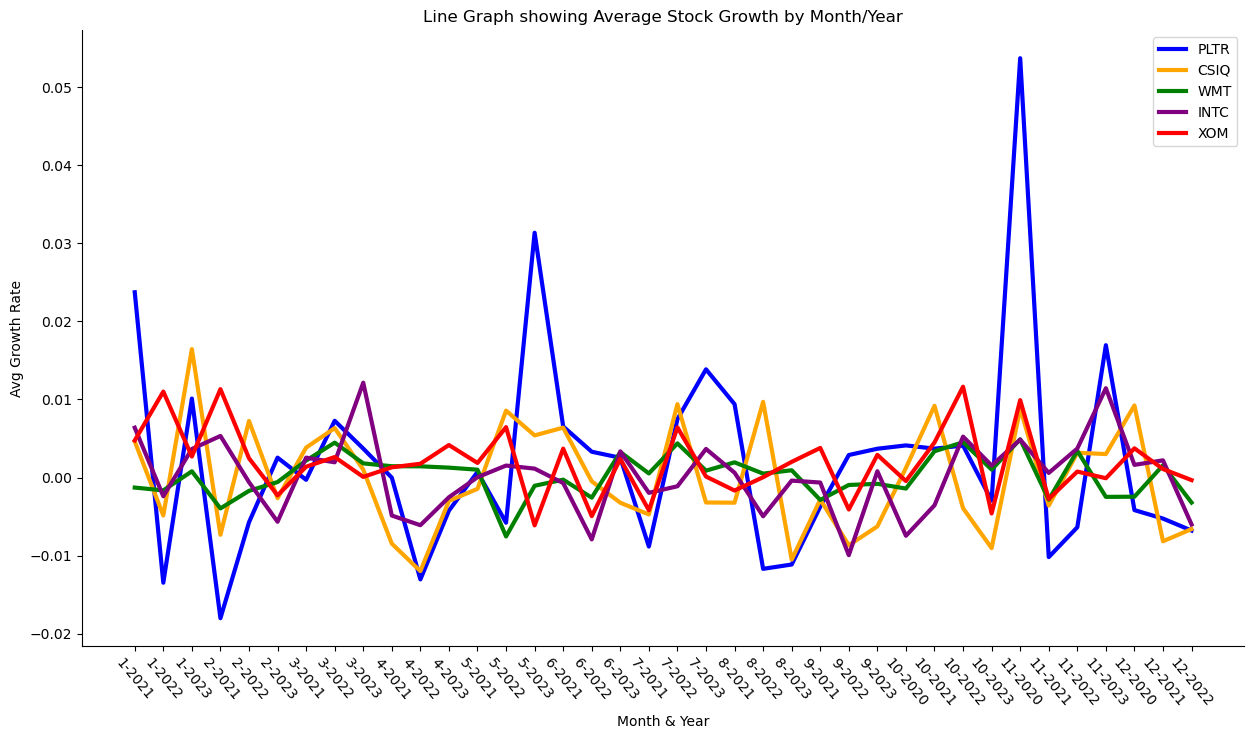

In [122]:
# Plotting the line graph for average stock growth by Month/Year
fig, ax = plt.subplots(figsize = (15, 8))
plt.plot(Mean_growthreset['Month_Year'], Mean_growthreset['PLTR_growth'], color = "blue", linewidth = 3, label='PLTR')
plt.plot(Mean_growthreset['Month_Year'], Mean_growthreset['CSIQ_growth'], color = "orange", linewidth = 3,label='CSIQ')
plt.plot(Mean_growthreset['Month_Year'], Mean_growthreset['WMT_growth'], color = "green", linewidth = 3,label='WMT')
plt.plot(Mean_growthreset['Month_Year'], Mean_growthreset['INTC_growth'], color = "purple", linewidth = 3,label='INTC')
plt.plot(Mean_growthreset['Month_Year'], Mean_growthreset['XOM_growth'], color = "red", linewidth = 3,label='XOM')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("Month & Year") 
plt.ylabel("Avg Growth Rate") 
plt.xticks(rotation = -50)
plt.title("Line Graph showing Average Stock Growth by Month/Year") 
plt.legend()

**Discussion**  
This line graph represents the average growth of five stock prices over time, PLTR, CSIQ, WMT, INTC and XOM. Of all the stocks, PLTR has the sharpest increases and decreases of average price stock growth amongst the time period, making it more inconsistent in comparison to the other stocks, whilst  WMT seems to be the stock with the least sharp average price stock growth rate, making it the more consistent stock. CSIQ is almost as inconsistent as PLTR, but faces slightly less sharp increases and decreases during the time period. INTC and XOM on the other hand have the smallest difference of the five stocks in how their average price stock growth fluctuates. Overall, despite PLTR facing the sharpest decreases, they also face the highest ever increase in October 2021 that make it one of the companies with the highest average price stock growth rate in the specified time periods.



### Conclusions

This project analyzed daily stock prices of five prominent companies: Exxon (XOM), Canadian Solar (CSIQ), Intel (INTC), Walmart (WMT), and Palantir (PLTR). Key conclusions reveal Palantir's high volatility, Walmart's consistent growth, and moderate volatility for Canadian Solar and Intel, with Exxon showing relatively stable growth. These insights demonstrate the project's feasibility for stock analysis, providing valuable information for informed investment decisions.
